In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import linregress
from scipy.optimize import curve_fit
%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '.container { width:100% !important; } '
            '</style>'
))
ax=16
ay=8
bx=8
by=6
cx=16
cy=10
dx=16
dy=6



In [ ]:
df = [ [10, 8.04, 10, 9.14, 10, 7.46, 8, 6.58],
      [8, 6.95, 8, 8.14, 8, 6.77, 8, 5.76],
      [13, 7.58, 13, 8.74, 13, 12.74,8, 7.71],
      [9, 8.81, 9, 8.77, 9, 7.11, 8, 8.84],
      [11, 8.33, 11, 9.26, 11, 7.81, 8, 8.47],
      [14, 9.96, 14, 8.10, 14, 8.84, 8, 7.04],
      [6, 7.24, 6, 6.13, 6, 6.08, 8, 5.25],
      [4, 4.26, 4, 3.10, 4, 5.39, 19, 12.50],
      [12, 10.84, 12, 9.13, 12, 8.15, 8, 5.56],
      [7, 4.82, 7, 7.26, 7, 6.42, 8, 7.91],
      [5, 5.68, 5, 4.74, 5, 5.73, 8, 6.89],
      [dx, dy, dx, dy, dx, dy, dx, dy]
     ]

df = pd.DataFrame(df, columns = ['ds1x','ds1y','ds2x','ds2y','ds3x','ds3y','ds4x','ds4y'])
df

,ds1x,ds1y,ds2x,ds2y,ds3x,ds3y,ds4x,ds4y
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [ ]:
res1=linregress(df['ds1x'], df['ds1y'])
res2=linregress(df['ds2x'], df['ds2y'])
res3=linregress(df['ds3x'], df['ds3y'])
res4=linregress(df['ds4x'], df['ds4y'])
dfpar=[[df['ds1x'].mean(), df['ds1x'].var(), df['ds1y'].mean(), df['ds1y'].var(), df['ds1y'].corr(df['ds1x'], method='spearman'), res1.slope, res1.intercept, res1.rvalue, df['ds1y'].corr(df['ds1x'])],
       [df['ds2x'].mean(), df['ds2x'].var(), df['ds2y'].mean(), df['ds2y'].var(), df['ds2y'].corr(df['ds2x'], method='spearman'), res2.slope, res2.intercept, res2.rvalue, df['ds2y'].corr(df['ds2x'])],
       [df['ds3x'].mean(), df['ds3x'].var(), df['ds3y'].mean(), df['ds3y'].var(), df['ds3y'].corr(df['ds3x'], method='spearman'), res3.slope, res3.intercept, res3.rvalue, df['ds3y'].corr(df['ds3x'])],
       [df['ds4x'].mean(), df['ds4x'].var(), df['ds4y'].mean(), df['ds4y'].var(), df['ds4y'].corr(df['ds4x'], method='spearman'), res4.slope, res4.intercept, res4.rvalue, df['ds4y'].corr(df['ds4x'])]
      ]

dfpar = pd.DataFrame(dfpar, columns = ['media x','varianza x','media y','varianza y','correlacion','pendiente','ordenada','R^2', 'correlacion pearson'])
dfpar


,media x,varianza x,media y,varianza y,correlacion,pendiente,ordenada,R^2,correlacion pearson
0,9.583333,14.083333,7.375833,3.939790,0.601399,0.292926,4.568623,0.553828,0.553828
1,9.583333,14.083333,7.375833,3.940117,0.447552,0.292862,4.569242,0.553683,0.553683
2,9.583333,14.083333,7.375000,3.935336,0.678322,0.292706,4.569903,0.553724,0.553724
3,9.583333,14.083333,7.375833,3.936136,0.236525,0.292797,4.569860,0.553840,0.553840


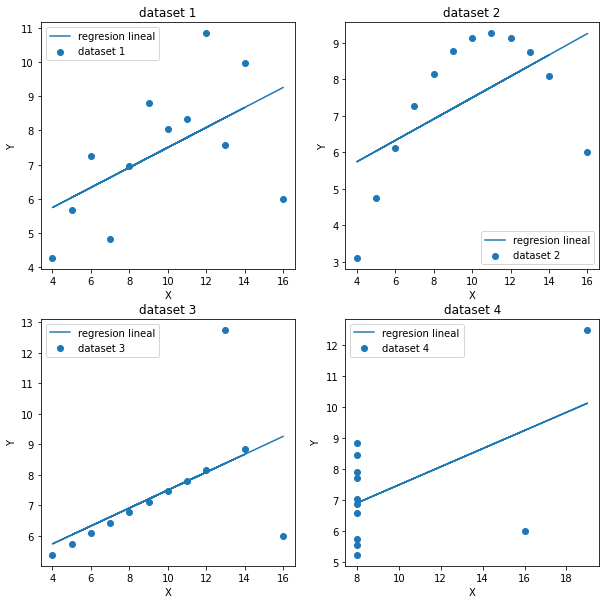

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df['ds1x'], df['ds1y'],label='dataset 1')
plt.plot(df['ds1x'], res1.intercept+res1.slope*df['ds1x'], label='regresion lineal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset 1')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(df['ds2x'], df['ds2y'], label='dataset 2')
plt.plot(df['ds2x'], res1.intercept+res1.slope*df['ds2x'], label='regresion lineal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset 2')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(df['ds3x'], df['ds3y'], label='dataset 3')
plt.plot(df['ds3x'], res1.intercept+res1.slope*df['ds3x'], label='regresion lineal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset 3')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(df['ds4x'], df['ds4y'], label='dataset 4')
plt.plot(df['ds4x'], res1.intercept+res1.slope*df['ds4x'], label='regresion lineal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset 4')
plt.legend()

In [ ]:
fig = go.Figure()
fig.add_traces(go.Scatter( x = df['ds1x'], y = df['ds1y'], mode = 'markers',name = 'Serie 1'))
fig.add_traces(go.Scatter( x = df['ds2x'], y = df['ds2y'], mode = 'markers',name = 'Serie 2'))
fig.add_traces(go.Scatter( x = df['ds3x'], y = df['ds3y'], mode = 'markers',name = 'Serie 3'))
fig.add_traces(go.Scatter( x = df['ds4x'], y = df['ds4y'], mode = 'markers',name = 'Serie 4'))